In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
sys.path.append('..')

import dataset
import tree_search
import backprop
import jump_backprop
import constraints

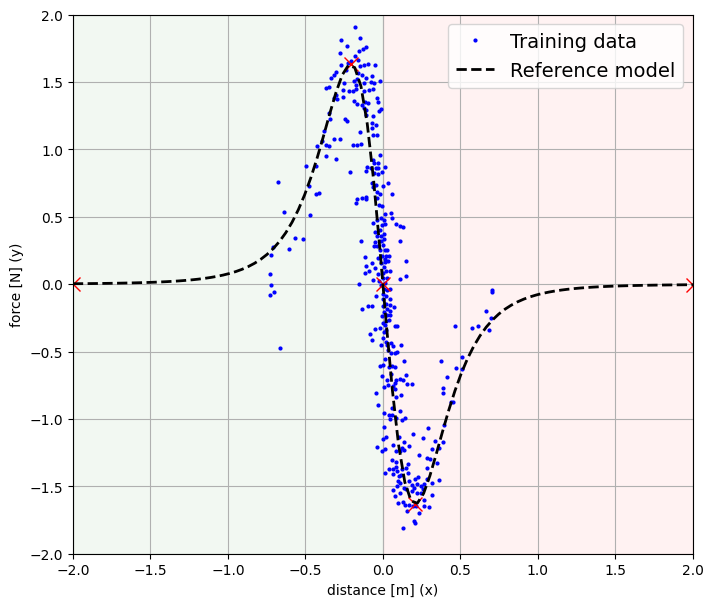

In [2]:
S = dataset.MagmanDatasetScaled()
#S.sample(size=100, noise=0.0000001, mesh=True)
S.load('../data/magman.csv')
S.plot(width=8, height=7)

In [3]:
unknown_stree_a = backprop.UnknownSyntaxTree('A')
unknown_stree_b = backprop.UnknownSyntaxTree('B')
stree     = backprop.BinaryOperatorSyntaxTree('/', unknown_stree_a, unknown_stree_b)
stree_pr  = stree.diff().simplify()
stree_pr2 = stree_pr.diff().simplify()
print(str(stree))
print(str(stree_pr))
print(str(stree_pr2))

(A(x) / B(x))
(((A'(x) * B(x)) - (A(x) * B'(x))) / (B(x) ^ 2))
((((((A''(x) * B(x)) + (A'(x) * B'(x))) - ((A'(x) * B'(x)) + (A(x) * B''(x)))) * (B(x) ^ 2)) - (((A'(x) * B(x)) - (A(x) * B'(x))) * ((2 * (B(x) ^ 1)) * B'(x)))) / (B(x) ^ 4))


[0, 5], [5, 45], [45, 47], [47, 107]
Total data constraints:      360
Total knowledge constraints: 107
========== Syntax Tree Inference ==========
TREE FOUND P_a(x)/P_b(x)
TREE FOUND P_a(x)/P_b(x)
ACTUAL RESTARTS: 10

Data tuning (avg time):      0 ms
Knowledge tuning (avg time):   0 ms
Data tuning (total time):      160 ms
Knowledge tuning (total time): 0 ms

Get system (avg time): 0 ms
Get system (total time): 127 ms
Get system (total calls): 1944

Setcoeffs (total time): 0 ms


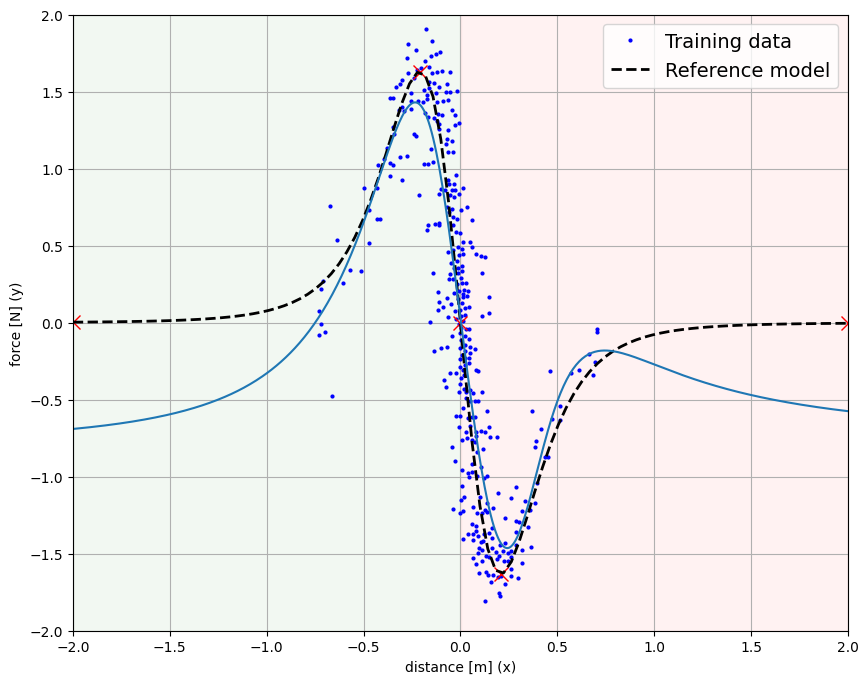

In [4]:
# returns a fitted A(x)/B(x) model
search_stree, data_tuning_report, knowledge_image_tuning_report, knowledge_deriv_tuning_report = \
    tree_search.infer_syntaxtree(S, max_degree=4, max_degree_inner=1, max_depth=10, trials=350, pk_pressure=0.)
search_stree.set_coeffs( data_tuning_report['sol'] )

# set fitted unknown models
stree.set_unknown_model( 'A', search_stree.children[0].evaluate )
stree.set_unknown_model( 'B', search_stree.children[1].evaluate )
stree_pr.set_unknown_model( 'A', search_stree.children[0].evaluate )
stree_pr.set_unknown_model( 'B', search_stree.children[1].evaluate )
stree_pr.set_unknown_model( "A'", search_stree.children[0].evaluate_deriv )
stree_pr.set_unknown_model( "B'", search_stree.children[1].evaluate_deriv )

# pack unknown strees labels
unknown_strees_labels = ['A', 'B']

# plot stree
S.plot()
xstree = np.linspace(S.xl, S.xu, 500)
ystree = [stree.compute_output(x) for x in xstree]
plt.plot(xstree, ystree);

In [5]:
hist = jump_backprop.jump_backprop(stree, stree_pr, unknown_strees_labels, S, maxiters=1, mesh=True)

#S.plot()
#xstree = np.linspace(S.xl, S.xu, 500)
#ystree = [stree.compute_output(x) for x in xstree]
#plt.plot(xstree, ystree);

Pulling from A for derivative 0
Pulling from B for derivative 0
Pulling from A' for derivative 1
Pulling from B' for derivative 1



--- Pull from A(x) - Simple found: False ---


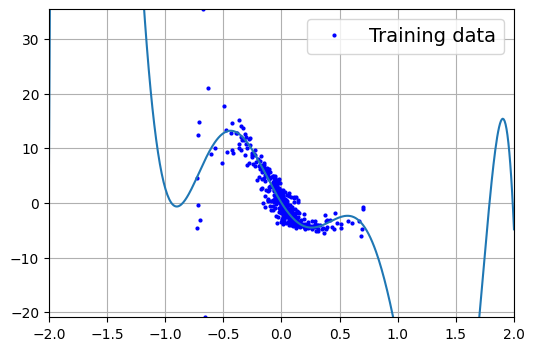

--- Pulled Constraints ---
A(0.00) = 0.00
A(-0.21) = 8.13
A(0.21) = -4.36
A(-2.00) = 7.23
A(2.00) = -4.84
A(-2.00) > 0.00
A(-1.79) > 0.00
A(-1.58) > 0.00
A(-1.37) > 0.00
A(-1.16) > 0.00
A(-0.95) > 0.00
A(-0.74) > 0.00
A(-0.53) > 0.00
A(-0.32) > 0.00
A(-0.11) > 0.00
A(0.11) < 0.00
A(0.32) < 0.00
A(0.53) < 0.00
A(0.74) < 0.00
A(0.95) < 0.00
A(1.16) < 0.00
A(1.37) < 0.00
A(1.58) < 0.00
A(1.79) < 0.00
A(2.00) < 0.00

--- Pull from B(x) - Simple found: False ---


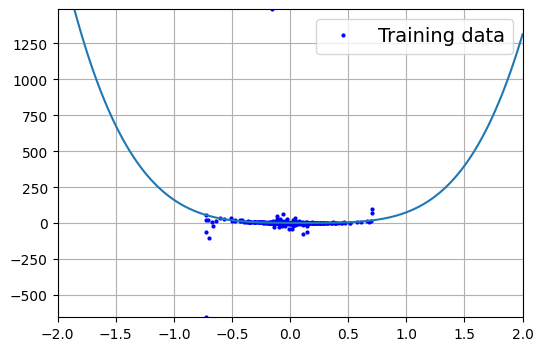

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


--- Pulled Constraints ---
B(-0.21) = 4.98
B(0.21) = 2.68
B(-2.00) = 1963.90
B(2.00) = 1313.08
B(-2.00) > 0.00
B(-1.79) > 0.00
B(-1.58) > 0.00
B(-1.37) > 0.00
B(-1.16) > 0.00
B(-0.95) > 0.00
B(-0.74) > 0.00
B(-0.53) > 0.00
B(-0.32) > 0.00
B(-0.11) > 0.00
B(0.11) > 0.00
B(0.32) > 0.00
B(0.53) > 0.00
B(0.74) > 0.00
B(0.95) > 0.00
B(1.16) > 0.00
B(1.37) > 0.00
B(1.58) > 0.00
B(1.79) > 0.00
B(2.00) > 0.00

--- Violated Constraints ---
Model(0.00) = 0.00

--- Pull from A'(x) - Simple found: False ---


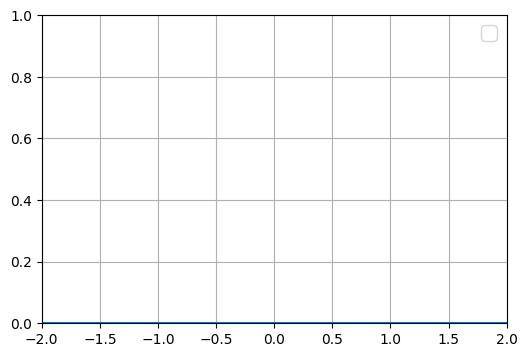

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


--- Pulled Constraints ---
A'(-0.21) = -29.11
A'(0.21) = -3.71
A'(-2.00) > 2534.48
A'(-1.79) > 1772.75
A'(-1.58) > 1168.21
A'(-1.37) > 704.20
A'(-1.16) > 364.27
A'(-0.95) > 132.44
A'(-0.74) > -6.18
A'(-0.53) > -64.09
A'(-0.32) > -52.29
A'(-0.11) < -9.47
A'(0.11) < 0.56
A'(0.32) > -11.62
A'(0.53) > -17.28
A'(0.74) > -20.93
A'(0.95) > -63.13
A'(1.16) > -167.84
A'(1.37) > -352.87
A'(1.58) > -635.11
A'(1.79) > -1031.36
A'(2.00) > -1558.44

--- Pull from B'(x) - Simple found: False ---


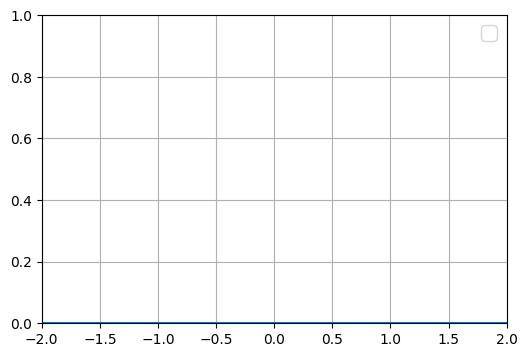

--- Pulled Constraints ---
B'(-0.21) = 0.00
B'(0.21) = -0.00
B'(-2.00) < -0.00
B'(-1.79) < -0.00
B'(-1.58) < -0.00
B'(-1.37) < -0.00
B'(-1.16) < -0.00
B'(-0.95) < -0.00
B'(-0.74) > 0.00
B'(-0.53) > 0.00
B'(-0.32) > 0.00
B'(-0.11) < 0.00
B'(0.11) > -0.00
B'(0.32) < -0.00
B'(0.53) < -0.00
B'(0.74) < -0.00
B'(0.95) < -0.00
B'(1.16) < -0.00
B'(1.37) < -0.00
B'(1.58) < -0.00
B'(1.79) < -0.00
B'(2.00) < -0.00


In [6]:
constrmap = constraints.ConstraintMap()

for hist_entry in hist.entries:
    print(f"\n--- {hist_entry.msg} - Simple found: {hist_entry.simple_found} ---")
    
    hist_entry.pulled_S.plot(width=6, height=4, plotref=False)
    xp = np.linspace(hist_entry.pulled_S.xl, hist_entry.pulled_S.xu, 500)
    plt.plot(xp, hist_entry.fit_model(xp));
    #plt.xlim(S.xl, S.xu)
    #plt.ylim(S.yl, S.yu)
    plt.show()

    print("--- Pulled Constraints ---")
    for (dp, relopt) in hist_entry.pulled_constrs:
        dp_x_str = "{:.2f}".format(dp.x)
        dp_y_str = "{:.2f}".format(dp.y)
        constrmap.add(hist_entry.model_name, dp.x, dp.y, relopt)
        print(f"{hist_entry.model_name}({dp_x_str}) {relopt.opt} {dp_y_str}")
    
    if len(hist_entry.violated_constrs) > 0:
        print("\n--- Violated Constraints ---")
        for (dp, relopt) in hist_entry.violated_constrs:
            dp_x_str = "{:.2f}".format(dp.x)
            dp_y_str = "{:.2f}".format(dp.y)
            print(f"Model({dp_x_str}) {relopt.opt} {dp_y_str}")

In [7]:
constrmap.merge()
print(constrmap)

print()

for model_name in unknown_strees_labels:
    for derivdeg in [0]:
        full_model_name = model_name + ("'" * derivdeg)
        print(full_model_name)
        print(stree.get_unknown_stree(full_model_name).compute_output)
        print(f"Constraints Fitting {full_model_name}: " +
              f"{constrmap.compute_fitting(full_model_name, stree.get_unknown_stree(full_model_name).compute_output)}")

--- Constraints for A ---
A(0.00) = 0.00
A(-0.21) = 8.13
A(0.21) = -4.36
A(-2.00) = 7.23
A(2.00) = -4.84
A(-1.79) > 0.00
A(-1.58) > 0.00
A(-1.37) > 0.00
A(-1.16) > 0.00
A(-0.95) > 0.00
A(-0.74) > 0.00
A(-0.53) > 0.00
A(-0.32) > 0.00
A(-0.11) > 0.00
A(0.11) < 0.00
A(0.32) < 0.00
A(0.53) < 0.00
A(0.74) < 0.00
A(0.95) < 0.00
A(1.16) < 0.00
A(1.37) < 0.00
A(1.58) < 0.00
A(1.79) < 0.00

--- Constraints for B ---
B(-0.21) = 4.98
B(0.21) = 2.68
B(-2.00) = 1963.90
B(2.00) = 1313.08
B(-1.79) > 0.00
B(-1.58) > 0.00
B(-1.37) > 0.00
B(-1.16) > 0.00
B(-0.95) > 0.00
B(-0.74) > 0.00
B(-0.53) > 0.00
B(-0.32) > 0.00
B(-0.11) > 0.00
B(0.11) > 0.00
B(0.32) > 0.00
B(0.53) > 0.00
B(0.74) > 0.00
B(0.95) > 0.00
B(1.16) > 0.00
B(1.37) > 0.00
B(1.58) > 0.00
B(1.79) > 0.00

--- Constraints for A' ---
A'(-0.21) = -29.11
A'(0.21) = -3.71
A'(-2.00) > 2534.48
A'(-1.79) > 1772.75
A'(-1.58) > 1168.21
A'(-1.37) > 704.20
A'(-1.16) > 364.27
A'(-0.95) > 132.44
A'(-0.74) > -6.18
A'(-0.53) > -64.09
A'(-0.32) > -52.29
A'(-0

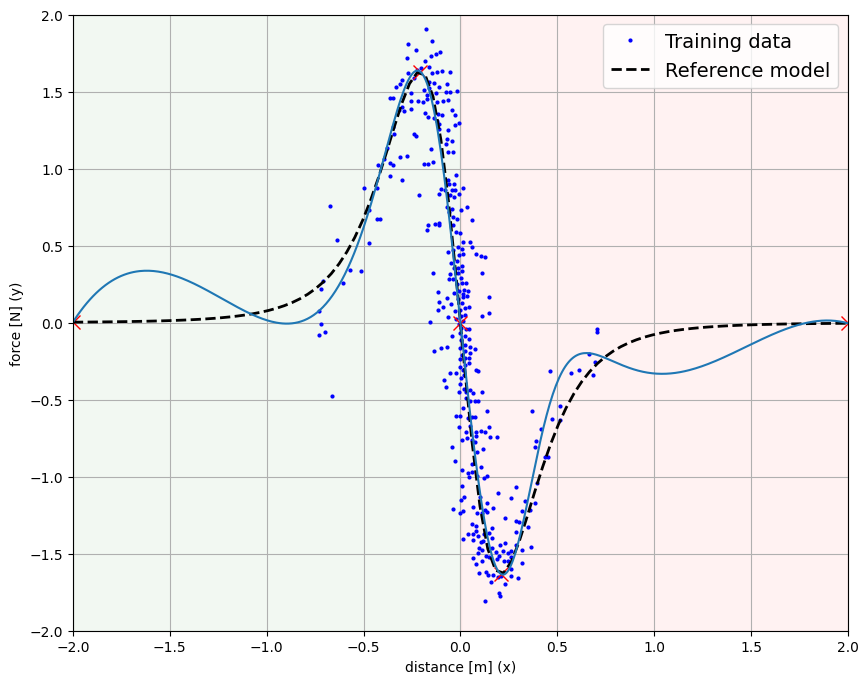

In [8]:
# plot final stree
S.plot()
xstree = np.linspace(S.xl, S.xu, 500)
ystree = [stree.compute_output(x) for x in xstree]
plt.plot(xstree, ystree);